<a href="https://colab.research.google.com/github/Pavel-Pyvovar/ml_iasa_2020/blob/master/ml_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Варіант 14

In [0]:
import numpy as np

Задано неорiєнтовний граф $G$ з $V$ вершинами, де ваги дуг $d_{ij}$ вiдомi для
$∀i, j = 1, ..., V$ . Побудувати пiдграф $J$ графу $G$, використовуючи наступнi
кроки:

1. Вiдсортувати ребра в порядку зростання їх ваг. $J :=$ ∅.

2. Додати ребро до $J$, якщо воно не утворює цикл з наявними ребрами.

3. Виконувати крок 2 до тих пiр поки до $J$ не буде додано $V − 1$ ребро.   

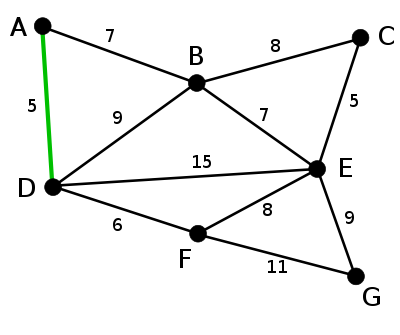

In [0]:
graph = {
    'v1': ['e12', 'e14'],
    'v2': ['e21', 'e23', 'e24', 'e25'],
    'v3': ['e32', 'e35'],
    'v4': ['e41', 'e42', 'e45', 'e46'],
    'v5': ['e52', 'e53', 'e54', 'e56', 'e57'],
    'v6': ['e64', 'e65', 'e67'],
    'v7': ['e75', 'e76']
}

edges = {
    'e12': 7,
    'e14': 5,
    'e24': 9,
    'e25': 7,
    'e23': 8,
    'e35': 5,
    'e45': 15,
    'e46': 6,
    'e56': 8,
    'e57': 9,
    'e67': 11
}


In [0]:
def get_by_val(dct, val):
  """
  Get dict key by its value.
  Params:
    dct -- python dict
    val -- value int the dct
  Returns:
    key that corresponds to val
  """
  for key in dct:
    if dct[key] == val:
      return key

In [0]:
def find_set(v, s):
  """
  Find set that contains vertex v
  in a disjoint set.
  Params:
    v -- vertex, element
    s -- disjoint set (list of lists)
  Returns:
    list from s that contains vertex v
  """
  for ls in s:
    if v in ls:
      return ls 

In [0]:
def union(u, v, s):
  """
  Concatenate lists that contain given vertices.
  Params:
    u, v -- two connected vectices of the graph
    s -- disjoint set
  Returns:
    The same disjoint set as s but with two sets
    containing u and v merged.
  """
  ls1 = find_set(u, s)
  ls2 = find_set(v, s)
  s.remove(ls1)
  s.remove(ls2)
  s.append(ls1 + ls2)
  return s

In [0]:
def kruskal(graph, edges):
  """
  Find a minimum spanning tree in a weighted undirected
  acyclic connected graph G.
  Params:
    G -- dict, keys: vertex symbols (vi), values: list of incedent adges.
    w -- dict, keys: edge symbols (eij), values: weight (int).
  Returns:
    MST -- minimum spanning tree, the same data structure as G.
  """
  MST = {v: [] for v in graph}
  forest = [[v] for v in graph]
  weights = sorted(edges.values())
  for w in weights:
    e = get_by_val(edges, w)
    i, j = e[1], e[2]
    if find_set(f'v{i}', forest) != find_set(f'v{j}', forest):
      MST[f'v{i}'].append(e)
      MST[f'v{j}'].append(e)
      forest = union(f'v{i}', f'v{j}', forest)
  return MST

In [22]:
kruskal(graph, edges)

{'v1': ['e14', 'e12'],
 'v2': ['e12', 'e23'],
 'v3': ['e23'],
 'v4': ['e14', 'e46', 'e45'],
 'v5': ['e45'],
 'v6': ['e46', 'e67'],
 'v7': ['e67']}

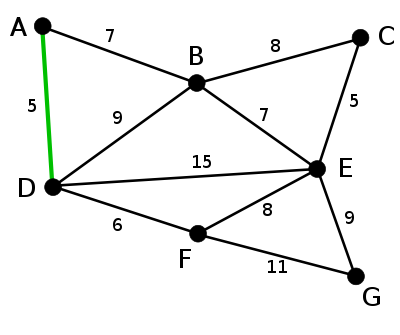

# Q&A

In [0]:
x = np.random.rand(3, 3, 3)
print(x[:, np.newaxis, :, :].shape)
np.expand_dims(x, 1).shape

(3, 1, 3, 3)


(3, 1, 3, 3)

In [0]:
x = np.random.rand(5)
y = np.random.rand(5)
print(x, y)
np.concatenate((x, y))

[0.95 0.85 0.78 0.24 0.19] [0.64 0.62 0.04 0.54 0.6 ]


array([0.95, 0.85, 0.78, 0.24, 0.19, 0.64, 0.62, 0.04, 0.54, 0.6 ])

In [0]:
x.tolist() + y.tolist()

[0.948187459070408,
 0.8503860250986834,
 0.7845952939794388,
 0.24145530108429536,
 0.19419031699338918,
 0.6353662700813787,
 0.617543088309151,
 0.042950356542567625,
 0.5412641640842555,
 0.5984719986081845]

In [0]:
x = np.random.rand(3, 3)
y = np.random.rand(3, 3)
print(x)
print(y)
np.concatenate((x, y), axis=1)

[[0.51 0.56 0.65]
 [0.45 0.52 0.86]
 [0.29 0.16 0.64]]
[[0.41 0.47 0.16]
 [0.7  0.03 0.48]
 [0.43 0.03 0.33]]


array([[0.51, 0.56, 0.65, 0.41, 0.47, 0.16],
       [0.45, 0.52, 0.86, 0.7 , 0.03, 0.48],
       [0.29, 0.16, 0.64, 0.43, 0.03, 0.33]])

In [0]:
x = np.random.rand(4, 1)
y = np.random.rand(4, 1)
print(x)
print(y)

print(np.vstack((x, y)))
print(np.hstack((x, y)))


[[0.99]
 [0.78]
 [0.06]
 [0.01]]
[[0.57]
 [0.14]
 [0.5 ]
 [0.29]]
[[0.99]
 [0.78]
 [0.06]
 [0.01]
 [0.57]
 [0.14]
 [0.5 ]
 [0.29]]
[[0.99 0.57]
 [0.78 0.14]
 [0.06 0.5 ]
 [0.01 0.29]]


In [0]:
np.vsplit(np.vstack((x, y)), 2 )

[array([[0.99],
        [0.78],
        [0.06],
        [0.01]]), array([[0.57],
        [0.14],
        [0.5 ],
        [0.29]])]

In [0]:
np.hsplit(np.hstack((x, y)), 2 )

[array([[0.99],
        [0.78],
        [0.06],
        [0.01]]), array([[0.57],
        [0.14],
        [0.5 ],
        [0.29]])]